In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows",15)   
pd.set_option("display.max_columns",15)  

### 问题

+ 船上人员的性别，年龄，船票等级？
+ 年龄分布？不同性别年龄分布？
+ 在船舱中的分布？
+ 登船地点?
+ 单身还有有家庭？
+ 哪些因素影响生还？
+ ...


https://www.kaggle.com/c/titanic

### 数据

In [3]:
titanic_df=pd.read_csv('../data/train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 不同性别人数

In [1]:
#http://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid
sns.factorplot('Sex',data=titanic_df,kind='count')

NameError: name 'sns' is not defined

### 不同性别，不同等级票的人数

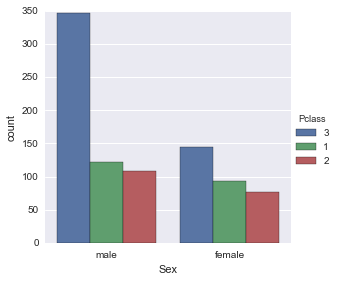

In [14]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

### 不同等级票的性别

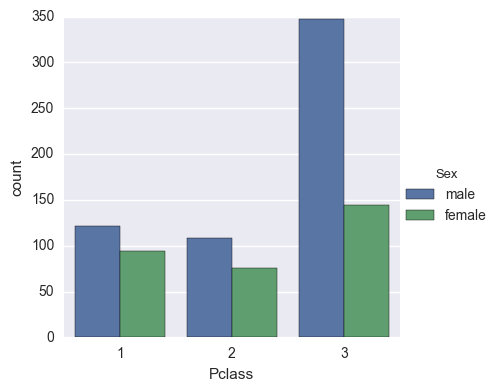

In [9]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count',order=[1,2,3])

### 男，女，小孩

In [6]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    

In [7]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [8]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


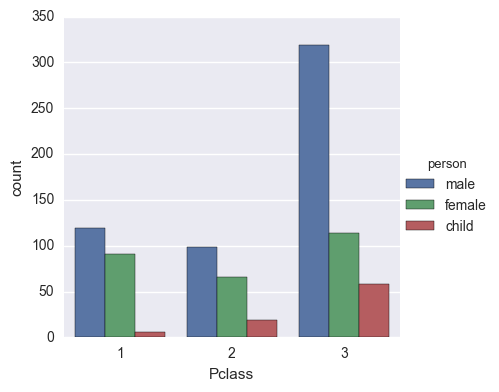

In [9]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')

### 年龄分析

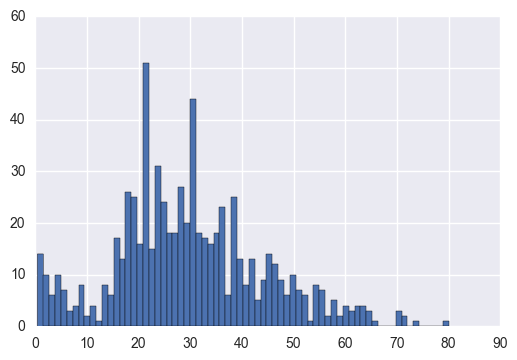

In [10]:
titanic_df['Age'].hist(bins=70)

In [11]:
titanic_df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [17]:
titanic_df['Age'].mean()

29.69911764705882

In [12]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [13]:
titanic_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
30.00    25
21.00    24
         ..
14.50     1
80.00     1
74.00     1
70.50     1
66.00     1
53.00     1
0.67      1
Name: Age, dtype: int64

C:\Anaconda\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


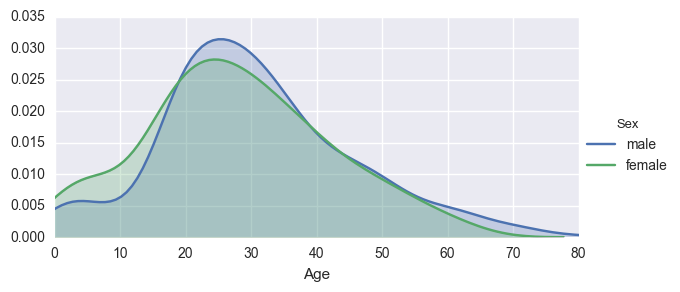

In [16]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=2) #sns.FacetGrid?, aspect宽高比率
fig.map(sns.kdeplot,'Age',shade=True)



oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

http://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid

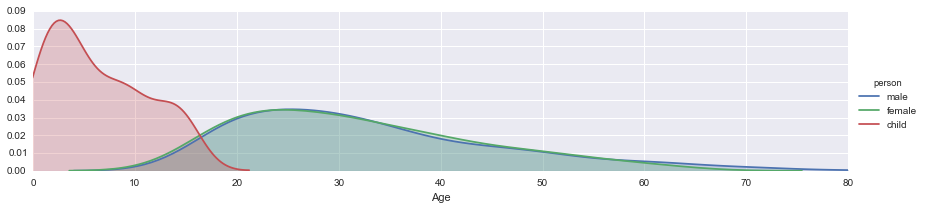

In [33]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

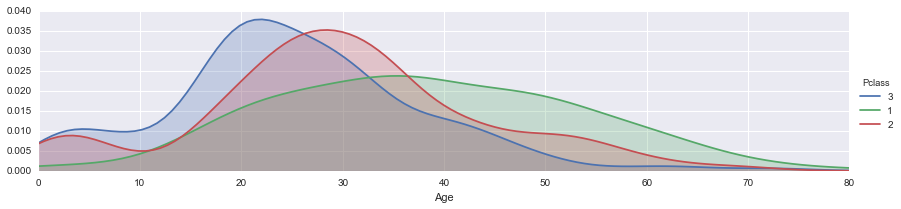

In [34]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


### 与船舱的关系

In [35]:
deck = titanic_df['Cabin'].dropna()

In [36]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

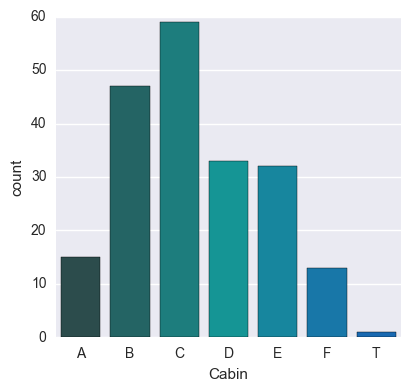

In [45]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count',
               order=['A','B','C','D','E','F','T'])
#http://matplotlib.org/users/colormaps.html

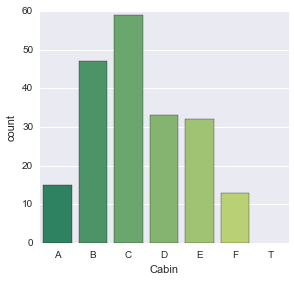

In [49]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count',
               order=['A','B','C','D','E','F','T'])

### 上船地点？

In [50]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


C:\Anaconda\envs\py35\lib\site-packages\seaborn\categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


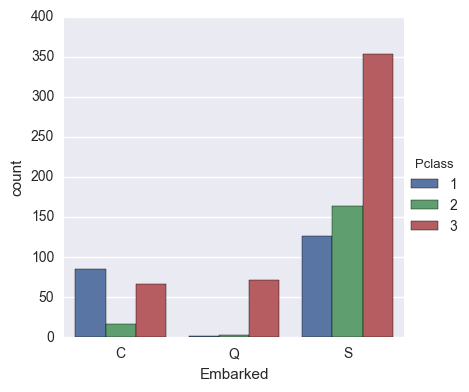

In [20]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',
               x_order=['C','Q','S'],kind='count')

### 一个人或者与家人同行

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [24]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
5      0
6      0
      ..
884    0
885    5
886    0
887    0
888    3
889    0
890    0
Name: Alone, dtype: int64

In [25]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Anaconda\envs\py35\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning

In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


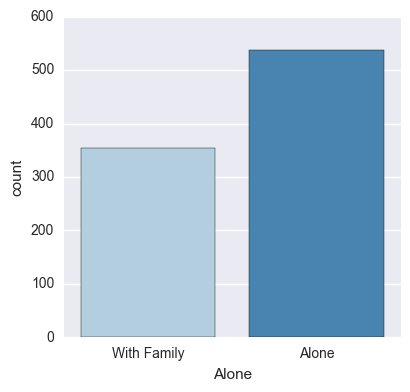

In [27]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

### 生还分析

In [30]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


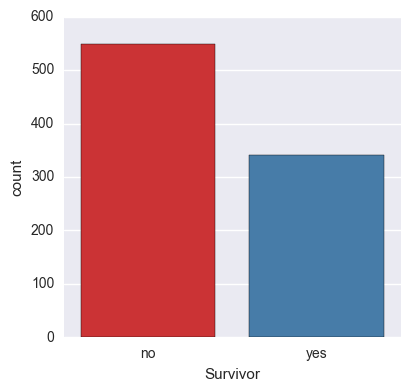

In [32]:
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind='count')

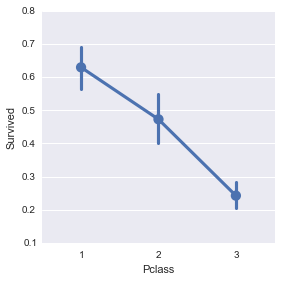

In [66]:
sns.factorplot('Pclass','Survived',data=titanic_df,order=[1,2,3])

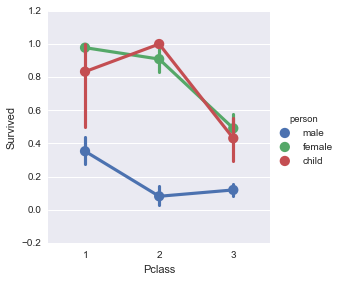

In [67]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df,order=[1,2,3])

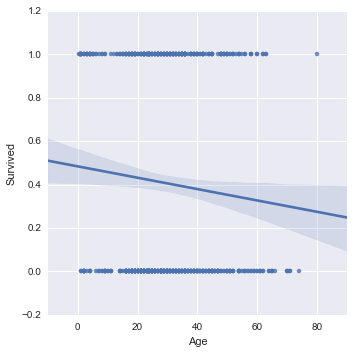

In [68]:
sns.lmplot('Age','Survived',data=titanic_df)

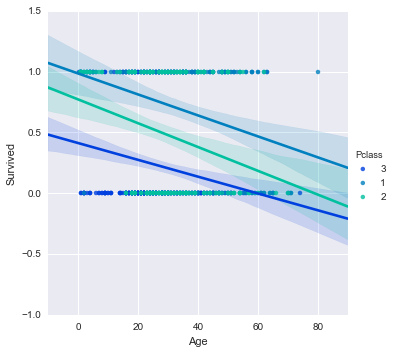

In [69]:
sns.lmplot('Age','Survived',hue='Pclass',
           data=titanic_df,palette='winter')

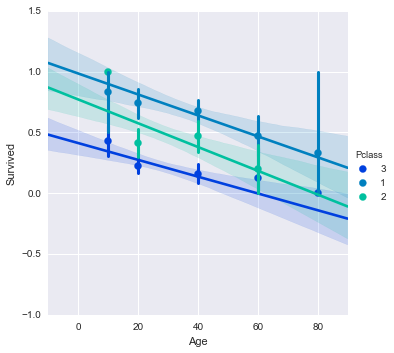

In [70]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,
           palette='winter',x_bins=generations)

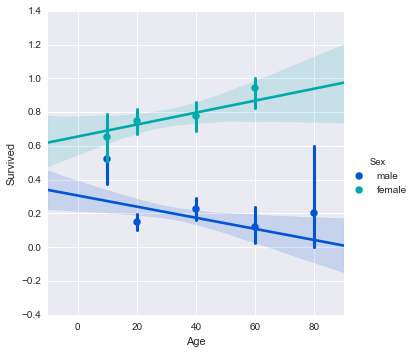

In [71]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,
           palette='winter',x_bins=generations)

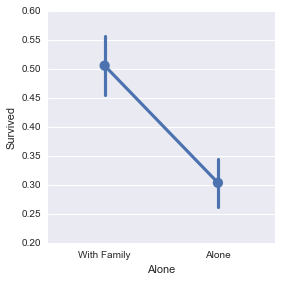

In [72]:
sns.factorplot('Alone','Survived',data=titanic_df)

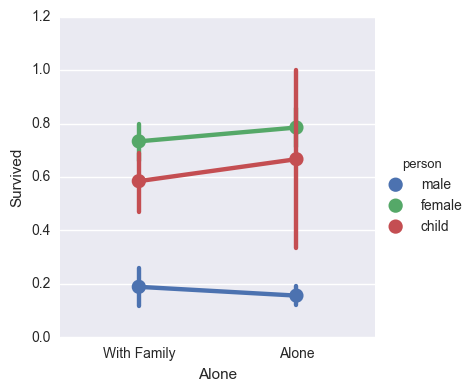

In [33]:
sns.factorplot('Alone','Survived',hue='person',data=titanic_df)

In [47]:
#sns.factorplot('Alone','Survived',hue='deck',data=titanic_df)